# Load Mnist Data


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0=pd.read_csv('Mnist_train.csv')

print(d0.head(5))

l=d0['label']

d=d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [10]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


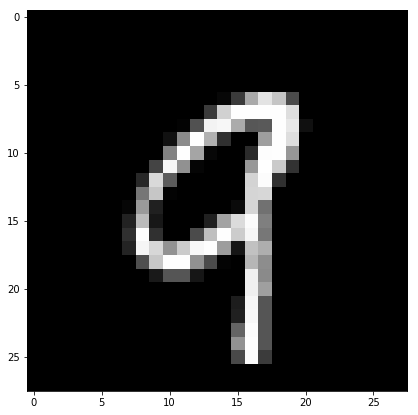

9


In [24]:
#display or plot a number
plt.figure(figsize=(7,7))
idx=41999

grid_data=d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation="none", cmap="gray")
plt.show()

print(l[idx])


In [26]:
labels=l.head(42000)
data=d.head(42000)
print("The shape of sample data= ",data.shape)

The shape of sample data=  (42000, 784)


In [57]:
#data Preprocessing: standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


In [58]:
#find the covariance of matrix which is: A^T *A
sample_data=standardized_data
#matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T,sample_data)
print("the shap of variance matrix= ", covar_matrix.shape)

the shap of variance matrix=  (784, 784)


In [59]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [60]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [61]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


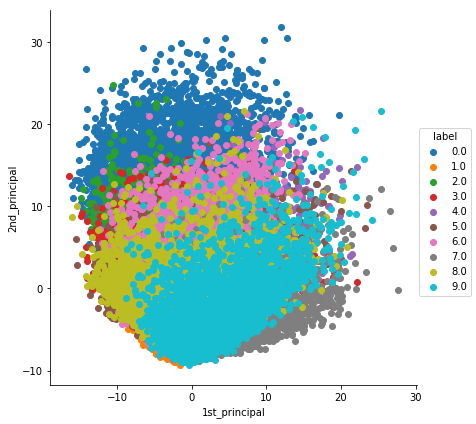

In [63]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()